In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

<ul>
<li> Substantiated : means there is sufficient credible evidence to believe that the subject officer committed the alleged act without legal justification. Substantiated cases are sent to the police department with a disciplinary recommendation.
<li>Within NYPD Guidelines : means the subject officer was found to have committed the act alleged, but the officer’s actions were determined to be lawful.
<li>Unfounded : means there is sufficient credible evidence to believe that the subject officer did not commit the alleged act.
Other Findings reflect the board’s decision that there isn’t enough evidence to determine whether or not what the officer did was wrong.

<li>Unable to Determine: means the available evidence is insufficient to determine whether the officer did or did not commit misconduct.
<li>Officer(s) Unidentified: means the agency was unable to identify the officers who committed the alleged misconduct.
<li>Miscellaneous: most of the time this means that the subject officer is no longer a member of the NYPD.
</ul>


source: https://www1.nyc.gov/site/ccrb/investigations/case-outcomes.page 

"The CCRB receives thousands of complaints every year, but it is only able to substantiate a tiny fraction of them. In 2018, the agency examined about 3,000 allegations of misuse of force. It substantiated 73."

source: https://projects.propublica.org/nypd-ccrb/officer/8397-michael-gonzalez

In [2]:
path = "/Users/jenifervivar/Desktop/Personal_projects/Police_profiles/Data/records.csv"
p_off = "/Users/jenifervivar/Desktop/Personal_projects/Police_profiles/Data/officers.csv"
p_r = "/Users/jenifervivar/Desktop/Personal_projects/Police_profiles/Data/ranks.csv"
police_ranks = pd.read_csv(p_r)

In [3]:
officers_info = pd.read_csv(p_off)
officers_info["assignment_date"] = pd.to_datetime(officers_info["assignment_date"], infer_datetime_format = True)
officers_info.drop(columns = ["full_name"], inplace = True)
officers_info["full_name"] = officers_info[["last_name", "first_name"]].apply(lambda x: re.sub(' +', ' ', ' '.join(x)), axis=1)
officers_info.drop(columns = ["last_name",	"first_name", "middle_initial"], inplace = True)
#officers_info.set_index('officer_id', drop = True, inplace = True)
officers_info.head(-1)

,officer_id,command,rank,shield_no,appt_date,recognition_count,arrest_count,ethnicity,assignment_date,arrests_infraction,arrests_misdemeanor,arrests_felony,arrests_violation,arrests_other,timestamp: 2022-08-29,full_name
0,933588,DEPT OF INVESTIGATION SQUAD,DETECTIVE 3RD GRADE,2442.0,1/20/2004,2,390,WHITE,2017-10-13,1.0,255.0,128.0,4.0,2.0,NaN,AANONSEN LORI
1,959433,047 PRECINCT,POLICE OFFICER,19427.0,10/7/2015,0,82,WHITE,2016-11-18,NaN,56.0,20.0,6.0,NaN,NaN,AANOUZ ABDELHADI
2,941300,STRATEGIC RESP GRP 1 MANHATTAN,POLICE OFFICER,44.0,7/10/2006,5,147,HISPANIC,2021-09-16,1.0,92.0,23.0,31.0,NaN,NaN,AARONSON JACOB
3,972490,MILITARY & EXTENDED LEAVE DESK,POLICE OFFICER,5985.0,10/12/2021,0,0,HISPANIC,2022-06-14,NaN,NaN,NaN,NaN,NaN,NaN,ABAD BRENDALIZ
4,932231,100 PCT ROCKAWAY BEACH DETAIL,POLICE OFFICER,318.0,7/1/2003,2,264,BLACK,2022-05-23,NaN,205.0,59.0,NaN,NaN,NaN,ABADIA DAVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32796,972330,104 PRECINCT,POLICE OFFICER,18425.0,7/7/2021,0,15,WHITE,2021-12-30,NaN,11.0,4.0,NaN,NaN,NaN,ZUZZOLO ANTHONY
32797,940893,100TH DET SQUAD,DETECTIVE 3RD GRADE,6559.0,1/9/2006,22,1000,WHITE,2020-02-14,2.0,502.0,496.0,NaN,NaN,NaN,ZVONIK JOSEPH
32798,954443,079 PRECINCT,POLICE OFFICER,30494.0,1/9/2013,0,46,WHITE,2015-07-13,7.0,27.0,7.0,5.0,NaN,NaN,ZVONIK SERGEY
32799,933512,076 PRECINCT,LIEUTENANT,NaN,7/1/2003,34,128,WHITE,2021-05-17,NaN,65.0,2.0,61.0,NaN,NaN,ZWEBEN HOWARD


In [9]:
officers_info["ethnicity"].value_counts()

WHITE              14457
HISPANIC            9964
BLACK               5018
ASIAN               3334
NATIVE AMERICAN       27
Name: ethnicity, dtype: int64

In [10]:
officers_info.isna().sum()

officer_id                   0
command                      0
rank                         0
shield_no                 2390
appt_date                    0
recognition_count            0
arrest_count                 0
ethnicity                    2
assignment_date              2
arrests_infraction       22680
arrests_misdemeanor        475
arrests_felony            1501
arrests_violation        11511
arrests_other            29772
timestamp: 2022-08-29    32802
full_name                    0
dtype: int64

In [11]:
complaints = pd.read_csv(path)
complaints["complaint_date"] = pd.to_datetime(complaints["complaint_date"], infer_datetime_format = True)
complaints["full_name"] = complaints[["last_name", "first_name"]].apply(lambda x: re.sub(' +', ' ', ' '.join(x)), axis=1)
complaints.drop(columns = ["last_name",	"first_name"], inplace = True)
#complaints.set_index("officer_id", drop = True, inplace=True)
complaints.head()

,officer_id,command,rank,shield_no,active,complaint_id,complaint_date,fado_type,allegation,board_disposition,nypd_disposition,penalty_desc,timestamp: 2022-08-28,full_name
0,31038,114 PCT,Police Officer,4439,False,200000003,2000-01-01,Abuse of Authority,Frisk and/or search,Substantiated (Command Discipline),NaN,NaN,NaN,WRIGHT CURTIS
1,31038,114 PCT,Police Officer,4439,False,200000003,2000-01-01,Abuse of Authority,Refusal to provide name/shield number,Substantiated (Command Discipline),NaN,NaN,NaN,WRIGHT CURTIS
2,31038,114 PCT,Police Officer,4439,False,200000003,2000-01-01,Force,Physical force,Substantiated (Command Discipline),NaN,NaN,NaN,WRIGHT CURTIS
3,55495,MED DIV,Police Officer,10384,False,200000003,2000-01-01,Abuse of Authority,Threat of force (verbal or physical),Substantiated (Command Discipline),NaN,NaN,NaN,RHODEN KYLE
4,55495,MED DIV,Police Officer,10384,False,200000003,2000-01-01,Force,Physical force,Substantiated (Command Discipline),NaN,NaN,NaN,RHODEN KYLE


In [12]:
result = complaints.merge(officers_info, left_on ="full_name", right_on="full_name" )
result.head()

,officer_id_x,command_x,rank_x,shield_no_x,active,complaint_id,complaint_date,fado_type,allegation,board_disposition,...,recognition_count,arrest_count,ethnicity,assignment_date,arrests_infraction,arrests_misdemeanor,arrests_felony,arrests_violation,arrests_other,timestamp: 2022-08-29
0,86092,WARRSEC,Lieutenant,0,True,200000006,2000-01-01,Discourtesy,Word,Unfounded,...,154,147,WHITE,2017-05-26,NaN,41.0,103.0,3.0,NaN,NaN
1,86092,WARRSEC,Lieutenant,0,True,200000006,2000-01-01,Offensive Language,Race,Unfounded,...,154,147,WHITE,2017-05-26,NaN,41.0,103.0,3.0,NaN,NaN
2,86092,WARRSEC,Lieutenant,0,True,200006136,2000-08-12,Force,Physical force,Exonerated,...,154,147,WHITE,2017-05-26,NaN,41.0,103.0,3.0,NaN,NaN
3,86092,WARRSEC,Lieutenant,0,True,200101180,2001-02-18,Force,Physical force,Exonerated,...,154,147,WHITE,2017-05-26,NaN,41.0,103.0,3.0,NaN,NaN
4,86092,WARRSEC,Lieutenant,0,True,200101180,2001-02-18,Force,Physical force,Exonerated,...,154,147,WHITE,2017-05-26,NaN,41.0,103.0,3.0,NaN,NaN


In [15]:
result.nypd_disposition.value_counts()

APU - Decision Pending                                    1896
Instructions                                              1613
No Disciplinary Action-DUP                                1420
Command Discipline - A                                    1281
Formalized Training                                       1173
Command Discipline - B                                     674
APU Guilty                                                 660
APU Not guilty                                             415
Not Guilty - DCT                                           238
Charges and Specifications - Guilty                        193
No Disciplinary Action-SOL                                 165
Plead Guilty - DCT                                         139
APU Closed: Retained, with discipline                      108
Charge Dismissed - DCT                                      88
APU Dismissed                                               63
No Finding                                             

In [ ]:
data_useful= {"officer_id": result.officer_id_x.values, "command": result.command_x.values, "rank": result.rank_x.values,\
             "fado_type": result.fado_type.values, "allegation":result.allegation.values, \
              "board_disposition":result.board_disposition.values, "police_full_name":result.full_name.values, \
              "ethnicity":result.ethnicity,"complaint_date": result.assignment_date}
data_combined = pd.DataFrame(data_useful)
data_combined.head()

In [19]:
len(data_combined)

130374

In [20]:
data_combined.isna().sum()

officer_id           0
command              0
rank                 0
fado_type            0
allegation           0
board_disposition    0
police_full_name     0
ethnicity            0
complaint_date       0
dtype: int64

In [23]:
data_combined['rank'].value_counts()

Police Officer            50123
Detective                 38554
Sergeant                  24812
Lieutenant                12509
Captain                    2021
Deputy Inspector           1081
Inspector                   700
Chiefs and other ranks      570
Inactive Ranks                4
Name: rank, dtype: int64

In [24]:
data_combined['command'].value_counts()

INT FIO PRG         3978
WARRSEC             3701
075 PCT             1617
NARCBBX             1491
IAB                 1405
                    ... 
CID TACTICAL TRN       1
NBBN NITRO             1
IAB GRP 41             1
B/S-WND                1
YTH DIV                1
Name: command, Length: 893, dtype: int64

In [25]:
data_combined.complaint_date

0        2017-05-26
1        2017-05-26
2        2017-05-26
3        2017-05-26
4        2017-05-26
            ...    
130369   2021-05-10
130370   2021-05-10
130371   2021-05-10
130372   2021-05-10
130373   2021-05-10
Name: complaint_date, Length: 130374, dtype: datetime64[ns]

<AxesSubplot:xlabel='complaint_date', ylabel='allegation'>

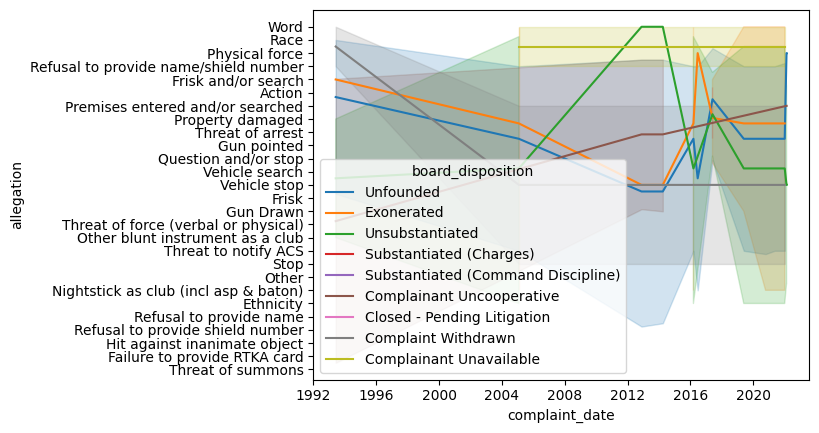

In [28]:
sns.lineplot(x="complaint_date", y="allegation",
             hue="board_disposition",
             data=data_combined[:200])

In [31]:
data_combined.to_csv("/Users/jenifervivar/Documents/GitHub/NYC_Police_Records/Data/policeComplaints_race.csv")

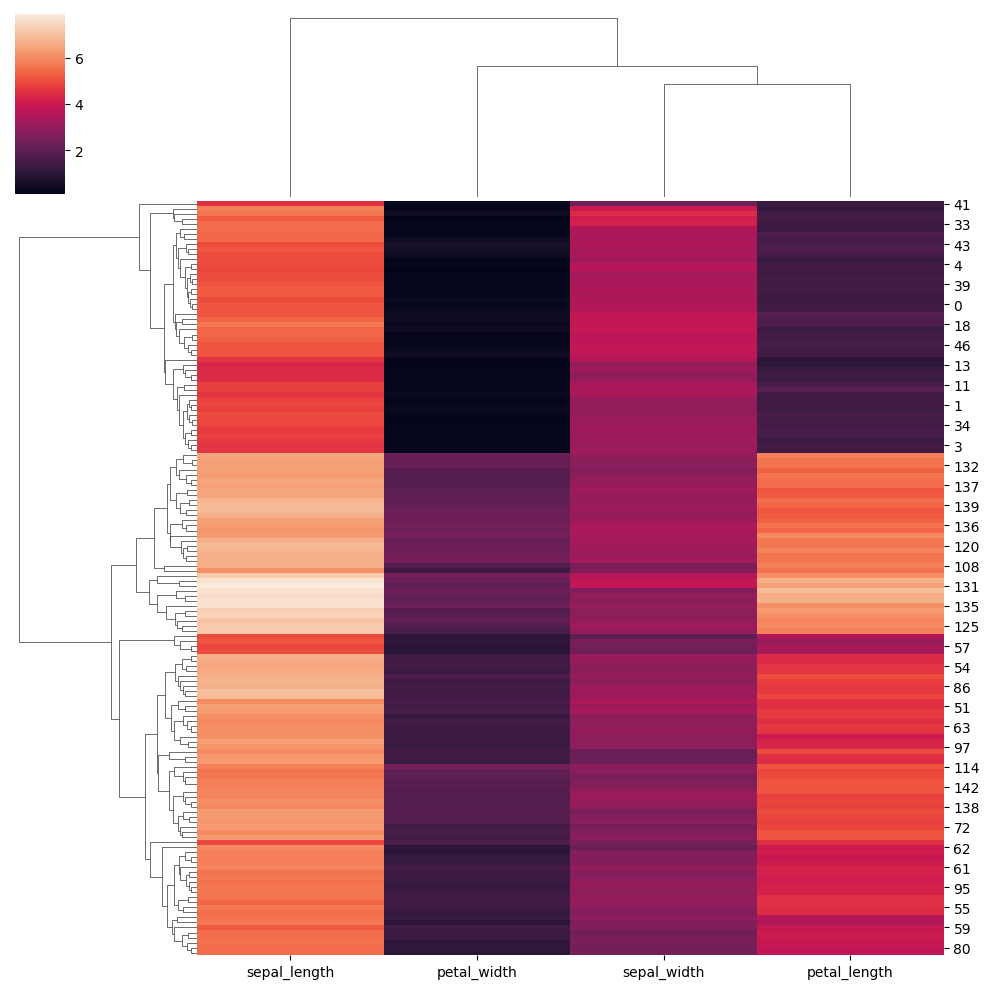

In [29]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)

In [30]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
14300/360

39.72222222222222

In [33]:
14300/4000

3.575